In [6]:
# !/bin/env python
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
sns.set_palette('colorblind')
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)
matplotlib.rc('axes',labelsize=15)
matplotlib.rcParams['text.usetex'] = False

import pandas as pd
import pystan
import corner

import pickle
import glob

import os
import sys

__outdir__ = os.path.expanduser('~')+'/PhD/Gaia_Project/Output/Parallax_Runs/Highruns/'
__datdir__ = os.path.expanduser('~')+'/PhD/Gaia_Project/data/KepxDR2/'


def read_data():
    sfile = __datdir__+'rcxyu18.csv'
    df = pd.read_csv(sfile)
    return df

df = read_data()

#Correct the Gaia G mags as per Casagrande & Vandenberg 2018b
mband = np.ones(len(df)) * df.GAIAmag.values
sel = (mband > 6.) & (mband < 16.5)
mband[sel] = 0.0505 + 0.9966*mband[sel]
merr = np.ones(len(mband)) * 10.e-3 #Setting precision to 10mmag by default


mband2 = np.ones(len(df)) * df.GAIAmag.values
sel = (mband2 > 6.) & (mband2 < 16.)
mband2[sel] = mband2[sel] - 0.0032*(mband2[sel] - 6.)

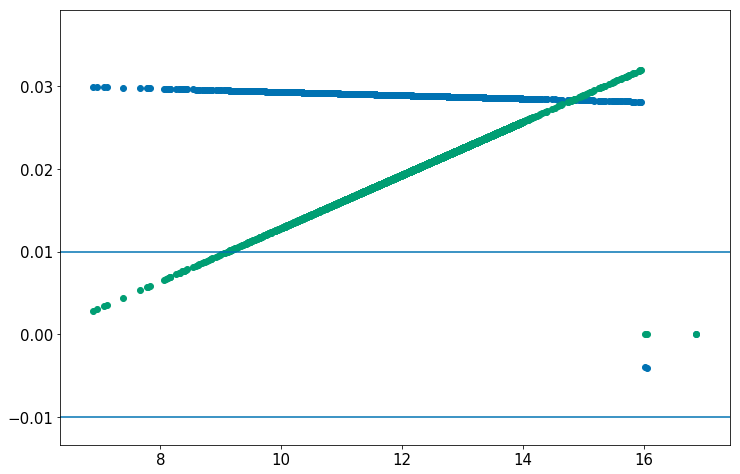

In [12]:
fig = plt.figure(figsize=(12,8))
plt.scatter(mband2, mband-mband2)
plt.scatter(mband2, df.GAIAmag.values - mband2)
plt.axhline(10.e-3)
plt.axhline(-10.e-3)